# Acción de control proporcional

En este caso se considera que $G_m = 1$, $G_f = 1$, $G_c = K_c$ y $G_d = K_d$, de manera que la respuesta del lazo de control será:

```{math}
:label: salida_bucle
y = \frac{K_c G_p}{1 + K_c G_p} y_{sp} + \frac{K_d}{1 + K_c G_p} d
```

## Procesos de primer orden

Para un proceso de primer orden sin sistema de control (lazo abierto, *open loop*):

$$\tau_p  \frac{\mathrm{d}y (t)}{\mathrm{d}t} + y (t) = K_p f (t) + K_d d (t)$$

con $y (0) = f (0) = d (0) = 0$, ya que se trata de variables de desviación. Realizando la transformada de Laplace de la ecuación diferencial anterior y operando se encuentra:

$$y (s) = \frac{K_p}{\tau_p s + 1} f (s) + \frac{K_d}{\tau_p s + 1} d (s)$$

Es decir: 

$$\begin{aligned}
 \text{Para un cambio en la consigna: } &
  G_p = \frac{K_p}{\tau_p s + 1} & \\
  \text{Para un cambio en la carga: } & G_d
  = \frac{K_d}{\tau_p s + 1} & \end{aligned}$$

Sustituyendo en la Ec. {eq}`salida_bucle`, salida de un bucle de retroalimentación (lazo cerrado, *closed loop*) y ordenando términos:

$$y = \frac{K_p'}{\tau'_p s + 1} y_{sp} + \frac{K_d'}{\tau'_p s + 1} d$$

donde $\tau'_p = \frac{\tau_p}{1 + K_p K_c}$, $K'_p = \frac{K_p K_c}{1 + K_p
K_c}$ y $K'_d = \frac{K_d}{1 + K_p K_c}$.

Se observa que:

1.  El lazo de control es un sistema de primer orden, al igual que el proceso

2.  La respuesta del lazo de control es más rápida que la del proceso ($\tau'_p < \tau_p$)

3.  El sistema formado por el proceso y el bucle de retroalimentación es menos sensible a los cambios que el sistema formado solamente por el proceso en sí ya que $K'_p < K_p$ y $K'_d < K_d$

Si se considera un cambio en la consigna según un escalón unidad y no se produce perturbación alguna ($d = 0$), se puede apreciar mejor el efecto del controlador proporcional. En este caso se observa que la respuesta final obtenida por el lazo de control no es la exigida por la consigna. Esta discrepancia es el *offset*.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Respuestas de un lazo cerrado formador por un proceso de primer orden y un controlador P. Respuestas para un acambio en escalón unidad: a) en la consigna, b) en la carga.
```

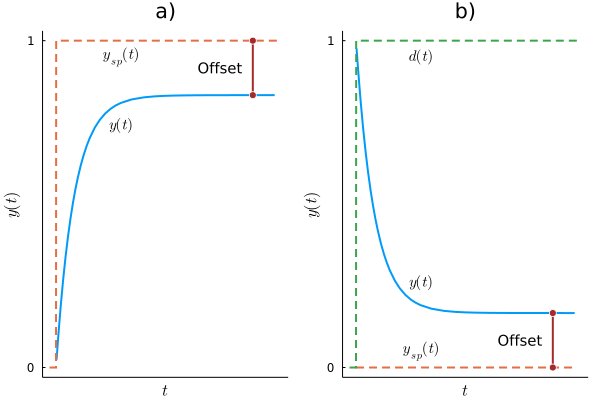

In [111]:
using SymPy, Plots, LaTeXStrings

s = symbols("s")
t = symbols("t", real=true)

# Cambio en la consigna
ysp = 1/s
Gp = 1/(s+1)
Gc = 5

G = Gc*Gp/(Gc*Gp+1)

y = sympy.inverse_laplace_transform(G*ysp, s, t)

y_inf = limit(y, t, oo)

l = @layout [a b]

p1 = plot(y, 0, 2, legend=false, lw=2,
    xlabel=L"t", ylabel=L"y(t)",
    ann=(0.6, float(y(0.6)-0.07), text(L"y(t)", pointsize=10)),
    grid=false, yticks=0:1, xticks=false,
    title="a)")
p1 = plot!(sympy.Heaviside(t), lw=2,
    linestyle=:dash,
    ann=(0.6, 0.95, text(L"y_{sp}(t)", pointsize=10)))
p1 = plot!([1.8,1.8], [y_inf,1], lw =2, color="brown",
    markershape = :circle, msc=:white, linestyle = :solid,
    ann=(1.7, 1-(1-float(y_inf))/2,
        text("Offset", halign=:right, pointsize=10)))

# Perturbaciones
d = 1/s

G = 1/(Gc*Gp+1)

y = sympy.inverse_laplace_transform(G*d, s, t)

y_inf = limit(y, t, oo)

p2 = plot(y, 0, 2, legend=false, lw=2,
    xlabel=L"t", ylabel=L"y(t)",
    grid=false, yticks=0:1, xticks=false,
    ann=(0.6, float(y(0.6)+0.07), text(L"y(t)", pointsize=10)),
    title="b)")
p2 = plot!([0,2], [0,0], lw=2, linestyle=:dash,
    ann=(0.6, 0.05, text(L"y_{sp}(t)", pointsize=10)))
p2 = plot!(sympy.Heaviside(t), lw=2, linestyle=:dash,
    ann=(0.6, 0.95, text(L"d(t)", pointsize=10)))
p2 = plot!([1.8,1.8], [y_inf,0], lw =2, color="brown",
    markershape = :circle, msc=:white, linestyle = :solid,
    ann=(1.7, float(y_inf)/2, text("Offset", halign=:right, pointsize=10)))


plot(p1, p2, layout=l)

Se define el *offset* como la diferencia entre el valor final de la consigna y el valor final de la respuesta:

$$\textit{Offset} = \lim_{t \to \infty} (y_{sp}-y)$$


Aplicando el Teorema del valor final (Ec. {eq}`valor_final`):

$$\textit{Offset} = \lim_{s \to 0} (s y_{sp}- s y)$$

En este caso:

$$\textit{Offset} = \lim_{s \to 0} \left(
   s \frac{1}{s} - s \frac{K'_p}{\tau'_p s + 1}  \frac{1}{s} \right) = 1 -
   \frac{K_p K_c}{1 + K_p K_c} = \frac{1}{1 + K_p K_c}$$

Para el problema de la regulación ($d = \frac{1}{s}$ y $y_{sp} = 0$):

$$\textit{Offset} = - \frac{K_d}{1 + K_p K_c}$$

Se observa en los dos caso que para eliminar el *offset* ($\textit{offset} \to 0$), la ganancia del controlador debe hacerse muy elevada ($K_c \to \infty$). Por razones de estabilidad, que se verán más adelante, no es conveniente utilizar valores elevados de $K_c$ para eliminar el *offset*.

Si el proceso es un integrador puro $\left( G_c = \frac{K_p}{s} \right)$, como por ejemplo la dinámica del nivel de un depósito, se comprueba que un sistema de control P es capaz de mantener el nivel de líquido en en el valor deseado dentro de un cierto margen. Si se calcula el *offset* de este tipo de sistemas (proceso más lazo de control) para una entrada en escalón, se obtiene el valor $- \frac{1}{K_c}$. Este valor puede ser aceptable para valores suficientemente elevados de $K_c$.

## Procesos de 2º orden

Se considera un lazo de control como el del caso anterior pero en el que se ha sustituido el proceso por un sistema de segundo orden. Si se realiza un cambio en la consigna, la respuesta queda como:

$$y = \frac{K'_p}{\tau^{\prime 2} s^2 + 2 \zeta' \tau' s + 1} y_{sp}$$

donde $\tau' = \frac{\tau}{\sqrt{1 + K_p K_c}}$, $\zeta' = \frac{\zeta}{\sqrt{1 + K_p K_c}}$ y $K_p = \frac{K_p K_c}{1 + K_p K_c}$.

Se cumple que:

1.  El lazo de control continua siendo un sistema de segundo orden.

2.  $K'_p < K_p$, $\tau' < \tau'$ y $\zeta' < \zeta$.

3.  Para una entrada en escalón unidad, *offset*$= \frac{1}{1 + K_p K_c}$. De nuevo, el *offset* tiende a 0, cuando la ganancia proporcional del controlador tiende a infinito.

4.  Dependiendo de $\zeta$, $\zeta'$ puede ser menor, mayor o igual a 1. Si la respuesta es sobreamortiguada, la velocidad de la respuesta es más lenta. Por tanto es preferible aumentar $K_c$ para lograr una respuesta subamortiguada. De esta manera se logra una respuesta más rápida y con un *offset* menor. El problema es que al aumentar $K_c$ aumenta el *overshoot*---lo que implica un aumento en la razón de disminución---y decrece el periodo de oscilación.